In [1]:
from langchain_community.document_loaders import DirectoryLoader, TextLoader

In [2]:

# loader = DirectoryLoader(
#     path="processed/",
#     glob="**/*.txt",           # recursive load of all txt files
#     loader_cls=TextLoader,     # use TextLoader for each file
#     show_progress=True
# )

# documents = loader.load()
# print(f"Loaded {len(documents)} text documents.")

import re
from langchain_community.document_loaders import DirectoryLoader, TextLoader

def extract_name_from_text(text):
    match = re.search(r"Name:\s*(.+)", text)
    if match:
        return match.group(1).strip()
    return "Unknown"

# Load all .txt files
loader = DirectoryLoader(
    "processed/",
    glob="*.txt",
    loader_cls=TextLoader,
    show_progress=True,
)
documents = loader.load()

# Add metadata: "name"
for doc in documents:
    name = extract_name_from_text(doc.page_content)
    doc.metadata["name"] = name


100%|██████████| 14/14 [00:00<00:00, 10136.42it/s]


In [3]:
documents[1]

Document(metadata={'source': 'processed/abdullahjashim06_posts.txt', 'name': 'Abdullah Jashim'}, page_content="Name: Abdullah Jashim\nHeadline: Mechanical Process Development Engineer | Chemical Engineer | Lean Six Sigma Practitioner | Process Improvement Strategist | Research and Innovation Enthusiast\nLocation: Dhaka, Bangladesh\nCurrent Company: Walton Hi-Tech Industries PLC.\n\nAbout: As a versatile chemical engineer, I have had the opportunity to work in various fields that have significantly broadened my skill set and expertise. My professional journey spans manufacturing of:\nAir-conditioner, Caustic Soda and Fertilizer\n#Strengths:\na. Analytical Thinking:\nAcross all roles, I have been responsible for analyzing data, identifying patterns, and deriving actionable insights. Whether it's optimizing a chemical process or troubleshooting a production issue, my ability to think critically and base decisions on data has been integral to my success. This analytical approach has been e

In [2]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
os.environ["HF_TOKEN"] = os.getenv("HF_TOKEN")
os.environ["GOOGLE_API_KEY"] = os.getenv("GOOGLE_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [ ]:
from langchain_huggingface.embeddings import HuggingFaceEmbeddings
# from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_groq import ChatGroq

# embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")
# llm = ChatGoogleGenerativeAI(
#     model="gemini-2.5-flash",
#     temperature=0,
#     max_tokens=None,
#     timeout=None,
#     max_retries=2
# )
llm = ChatGroq(model_name="qwen/qwen3-32b")

# from langchain.chat_models import init_chat_model

# # Initialize an OpenAI chat model
# llm = init_chat_model(
#     model="qwen/qwen3-32b",
#     model_provider="groq",
#     temperature=0.7,
#     max_tokens=500
# )

/home/md-al-amin/My-Projects/Data2llm-16-Personality-MBTI-Prediction-Pipeline-RAG-LoRA/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
from langchain_groq import ChatGroq

llm = ChatGroq(model_name="openai/gpt-oss-120b")

In [7]:
llm.invoke("Test line")

AIMessage(content="Sure, I'm here and ready to help! Let me know if you have any questions or need assistance with anything.", additional_kwargs={'reasoning_content': 'We need to respond. The user just wrote "Test line". Probably they want to see if the model works. So we can respond simply.'}, response_metadata={'token_usage': {'completion_tokens': 62, 'prompt_tokens': 73, 'total_tokens': 135, 'completion_time': 0.135034259, 'prompt_time': 0.002998741, 'queue_time': 0.048051799, 'total_time': 0.138033, 'completion_tokens_details': {'reasoning_tokens': 30}}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_e88ce9c728', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--97907dfd-30eb-4ad5-b600-14663a0ee68d-0', usage_metadata={'input_tokens': 73, 'output_tokens': 62, 'total_tokens': 135})

In [8]:
embed_len = len(embeddings.embed_query("Hello"))
embed_len

768

In [9]:
import faiss
from langchain_community.vectorstores import FAISS
from langchain_community.docstore.in_memory import InMemoryDocstore

In [10]:
index = faiss.IndexFlatL2(768)

In [11]:
## create VectorStore

AAladinVectorStore = FAISS(
    index=index,
    embedding_function=embeddings,
    docstore=InMemoryDocstore(),
    index_to_docstore_id={}
    
)

In [12]:
AAladinVectorStore.add_documents(documents=documents)

['ab154704-9d2b-4ad1-8446-165a7cb37a9c',
 'babe7d42-267f-4ecf-936f-e514f73d0a0a',
 '19384cba-b045-4ca6-83d7-fad78b926f00',
 '20328754-1ccf-4cf3-8e09-b5ac0349f967',
 'bfedf642-0dbc-49a2-8321-95504e4839be',
 'bb59fda2-aa2c-47d8-bf62-6f4dcd5a4961',
 'a0c6232a-53db-43df-bbb4-800a67b70b6f',
 '2ec76f21-d41e-48e8-8b15-ad07c47db90e',
 'e63768cb-184b-4888-98bb-24975d484551',
 '9c8d4ca4-e713-44ad-bf92-b35c6c7b498b',
 '7b4fa0d2-8c48-435c-b759-3632bb4d9a72',
 '8106fb53-7a9c-436d-a598-bf8fc6d8a616',
 'f773c067-86c1-4c80-a91f-25e71d196fd9',
 '1ffc42c0-ac7f-4d17-8d14-7fdd693170d3']

In [13]:
AAladinVectorStore.similarity_search("Al Amin", k=1, filter={"name": "Al Amin"})

[Document(id='20328754-1ccf-4cf3-8e09-b5ac0349f967', metadata={'source': 'processed/mdalamin5_posts.txt', 'name': 'Al Amin'}, page_content='Name: Al Amin\nHeadline: Generative AI Engineer | LangChain, LangGraph & RAG | Building intelligent multi-agent systems.\nLocation: Dhaka, Bangladesh\nCurrent Company: Genuine Technology & Research Ltd.\n\nAbout: A dedicated Computer Science student at Dhaka University with hands-on experience architecting and building end-to-end Generative AI applications. My passion lies in creating intelligent agents that can reason, remember, and interact naturally.\n\nTop Skills: Retrieval-Augmented Generation (RAG), AI Agents, Python (Programming Language)\n\nFeatured Section:\n\nExperience:\n- Generative AI Engineer at Genuine Technology & Research Ltd. (Full-time, May 2025 - Present, Dhaka, Bangladesh): Developing and deploying multi-agent systems using LangChain and LangGraph.\n\nEducation:\n- B.Sc in Computer Science from Dhaka University (2020 - 2024, Gr

In [14]:
search_name = "Al Amin"

In [15]:
retriever = AAladinVectorStore.as_retriever(
    search_kwargs={"k": 5, "filter": {"name": search_name}}
)


## Name Extractions

In [16]:
from pydantic import BaseModel, Field
from langchain_groq import ChatGroq
from dotenv import load_dotenv

load_dotenv()

# Example LLM (replace with your actual model)
# name_llm = ChatGroq(model_name="qwen/qwen3-32b")

class UserNameExtract(BaseModel):
    """This class is designed for user name extraction from the user input."""
    user_name: str = Field(
        description=(
            "Extract the user name from the user input. "
            "If the name is not found, simply return 'unknown'. "
            "Example: 'Tell me about Al Amin infos' -> user_name: 'Al Amin'"
        )
    )

# Wrap your LLM with structured output
llm_with_str_output = llm.with_structured_output(UserNameExtract)

# Use invoke_and_parse() to get a Pydantic object
result = llm_with_str_output.invoke("Tell me about Al Amin infos.")

print(result.user_name)


Al Amin


In [17]:
retriever.invoke("Tell me about Al Amin")

[Document(id='20328754-1ccf-4cf3-8e09-b5ac0349f967', metadata={'source': 'processed/mdalamin5_posts.txt', 'name': 'Al Amin'}, page_content='Name: Al Amin\nHeadline: Generative AI Engineer | LangChain, LangGraph & RAG | Building intelligent multi-agent systems.\nLocation: Dhaka, Bangladesh\nCurrent Company: Genuine Technology & Research Ltd.\n\nAbout: A dedicated Computer Science student at Dhaka University with hands-on experience architecting and building end-to-end Generative AI applications. My passion lies in creating intelligent agents that can reason, remember, and interact naturally.\n\nTop Skills: Retrieval-Augmented Generation (RAG), AI Agents, Python (Programming Language)\n\nFeatured Section:\n\nExperience:\n- Generative AI Engineer at Genuine Technology & Research Ltd. (Full-time, May 2025 - Present, Dhaka, Bangladesh): Developing and deploying multi-agent systems using LangChain and LangGraph.\n\nEducation:\n- B.Sc in Computer Science from Dhaka University (2020 - 2024, Gr

In [18]:


rag_prompt = """
You are a professional text-processing agent in a Retrieval-Augmented Generation (RAG) system. 
Your goal is to extract, elaborate, and preserve psychologically relevant signals from the user's professional profile and social media posts.

The downstream model is a fine-tuned personality prediction model (trained on the MITB dataset),
so you must generate a detailed, context-rich text that mirrors the user's authentic communication style and thought patterns.

## User Question
{question}

### INPUT
{context}

### TASK
Generate an **elaborated personality-relevant summary** that:
- Starts by clearly stating the user's name.
- Retains the user's tone, reasoning style, values, and emotional patterns.
- Expands slightly on ideas to create a coherent narrative while staying faithful to the text.
- Keeps important sentences or quotes from posts intact (don’t heavily compress them).
- Merges the profile and posts naturally, as if describing one person’s mindset and communication identity.
- Avoids lists, hashtags, or bullet points unless they were part of the original content.

### OUTPUT FORMAT
Return a plain text string in the following structure:

Username: <user's name>

Profile Summary:
<expanded, narrative description of the user's professional and personal profile>

Post Summary:
<detailed, elaborated synthesis of the user's posts, preserving reasoning, tone, and emotional cues>

### STYLE REQUIREMENTS
- Output should be detailed (approx. 1200–2000 tokens).
- Preserve natural tone — don’t make it robotic or overly summarized.
- Absolutely avoid speculative or made-up information.
- The output will be passed directly into a personality prediction LLM, so keep the style **raw, human-like, and content-rich.**
"""



In [19]:
from langchain_core.output_parsers import StrOutputParser

In [20]:
from langchain_core.runnables import RunnablePassthrough

def format_docs(retriever_docs):
    context_text = "\n\n".join(doc.page_content for doc in retriever_docs)
    return context_text

In [21]:
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

# Prompt Template
rag_prompt_template = PromptTemplate(
    input_variables=["context", "question"],
    template=rag_prompt
)

# RAG Chain
rag_chain = (
    {
        "context": retriever,
        "question": RunnablePassthrough()
    }
    | rag_prompt_template
    | llm
    | StrOutputParser()  # outputs a clean string
)


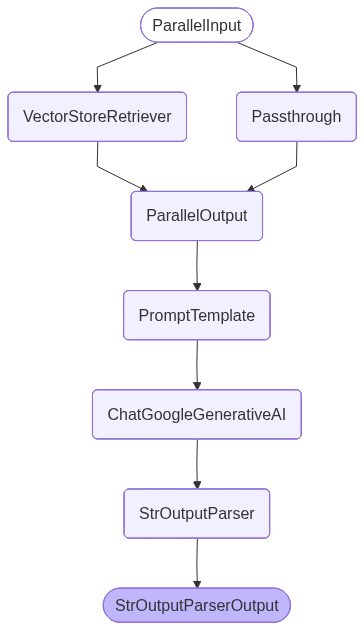

In [22]:
from IPython.display import display, Image
display(Image(rag_chain.get_graph().draw_mermaid_png()))

In [23]:
user_query = "Tell ABout the md al amin profession summary."

result = rag_chain.invoke(user_query)
print(result)


Username: Al Amin

Profile Summary:
Al Amin presents himself as a Generative AI Engineer, deeply immersed in the cutting-edge fields of LangChain, LangGraph, and Retrieval-Augmented Generation (RAG), with a clear focus on architecting and building intelligent multi-agent systems. Based in Dhaka, Bangladesh, he is currently contributing his expertise full-time at Genuine Technology & Research Ltd., where he is actively involved in developing and deploying these sophisticated multi-agent systems. His professional journey is underpinned by a strong academic foundation, as he is a dedicated Computer Science student at Dhaka University, having maintained an impressive CGPA of 3.80/4. His earlier education also reflects consistent academic excellence, with perfect GPA scores in both H.S.C. from Dhaka College and S.S.C. from Dhaka Residential Model College. This background highlights a persistent drive for achievement and a profound commitment to his field. His "About" section further elabora

In [24]:
# import json
# data = json.loads(result)
# data

## **Name Extractions from User input"**

In [25]:
from pydantic import BaseModel, Field
from typing import Annotated
from langchain_groq import ChatGroq
load_dotenv()


# name_llm = ChatGroq(model_name = "qwen/qwen3-32b")

class UserNameExtract(BaseModel):
    """This class is designed for user name extract from the user input."""
    user_name: str = Field(description="Extract the user name from the user input. if name not found the simply say 'unknown'")

# llm_with_str_output = name_llm.with_structured_output(UserNameExtract)
llm_with_str_output = llm.with_structured_output(UserNameExtract)

llm_with_str_output.invoke("Tell me about Sharier Choudhori infos.")


UserNameExtract(user_name='Sharier Choudhori')

## **Adding Guardrails into the rag**

In [26]:
import nest_asyncio
nest_asyncio.apply()

from nemoguardrails import RailsConfig
from nemoguardrails.integrations.langchain.runnable_rails import RunnableRails

In [28]:
config = RailsConfig.from_path("config")
guard_rail = RunnableRails(config=config, llm=llm)

guard_rail_chain = guard_rail | rag_chain

In [29]:
user_query = "Tell ABout the md al amin profession summary."

result = guard_rail_chain.invoke(user_query)
print(result)

Username: Al Amin

Profile Summary:
Al Amin presents himself as a Generative AI Engineer, deeply immersed in the cutting-edge fields of LangChain, LangGraph, and Retrieval-Augmented Generation (RAG), with a clear focus on architecting and building intelligent multi-agent systems. Based in Dhaka, Bangladesh, he is currently contributing his expertise full-time at Genuine Technology & Research Ltd., where he is actively involved in developing and deploying these sophisticated multi-agent systems. His professional journey is underpinned by a strong academic foundation, as he is a dedicated Computer Science student at Dhaka University, having maintained an impressive CGPA of 3.80/4. His earlier education also reflects consistent academic excellence, with perfect GPA scores in both H.S.C. from Dhaka College and S.S.C. from Dhaka Residential Model College. This background highlights a persistent drive for achievement and a profound commitment to his field. His "About" section further elabora